In [3]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Downloads/Ireland House Price Final(1).csv')

# Display basic info
print("Dataset Info:")
print(data.info())

# Display first few rows
print("Sample Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for basic statistics
print("\nStatistical Summary:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB
None
Sample Rows:
   ID     property_scope   availability       location       size total_sqft  \
0  

C:\Users\sai nikhil vaddadi\AppData\Local\Temp\ipykernel_6860\2215978724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['buying or not buying'], palette="Set2")


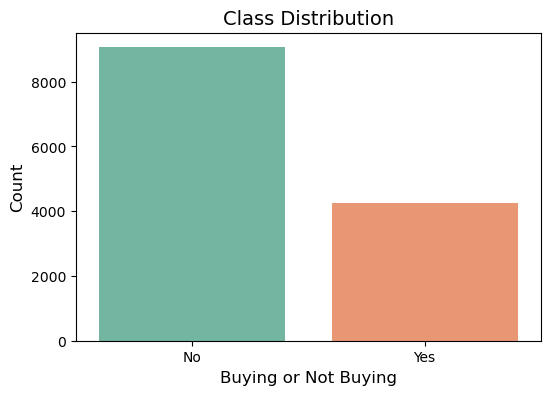

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['buying or not buying'], palette="Set2")
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Buying or Not Buying', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

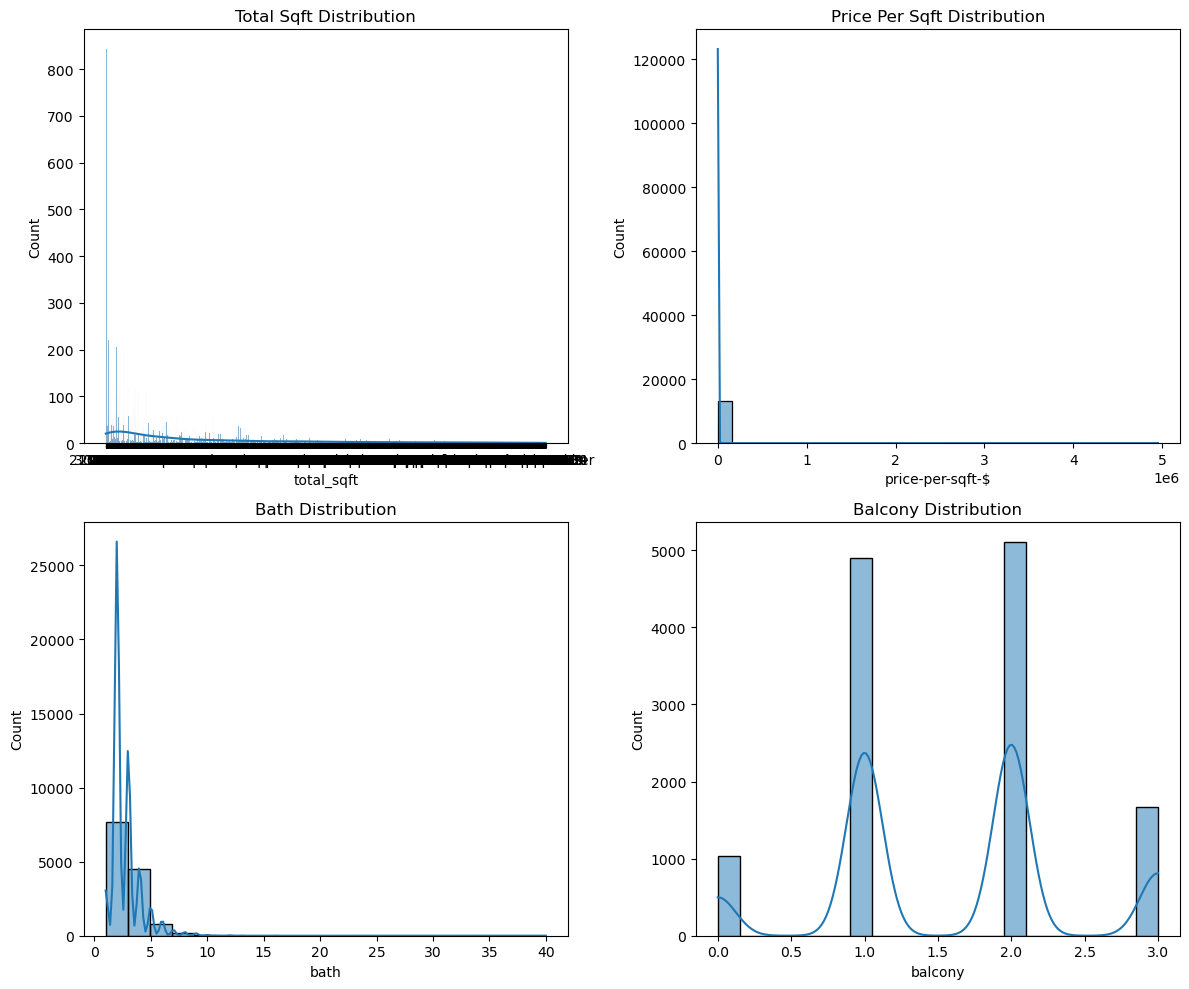

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['total_sqft'], bins=30, kde=True, ax=axs[0, 0]).set(title='Total Sqft Distribution')

sns.histplot(data['price-per-sqft-$'], bins=30, kde=True, ax=axs[0, 1]).set(title='Price Per Sqft Distribution')

sns.histplot(data['bath'], bins=20, kde=True, ax=axs[1, 0]).set(title='Bath Distribution')

sns.histplot(data['balcony'], bins=20, kde=True, ax=axs[1, 1]).set(title='Balcony Distribution')

plt.tight_layout()
plt.show()

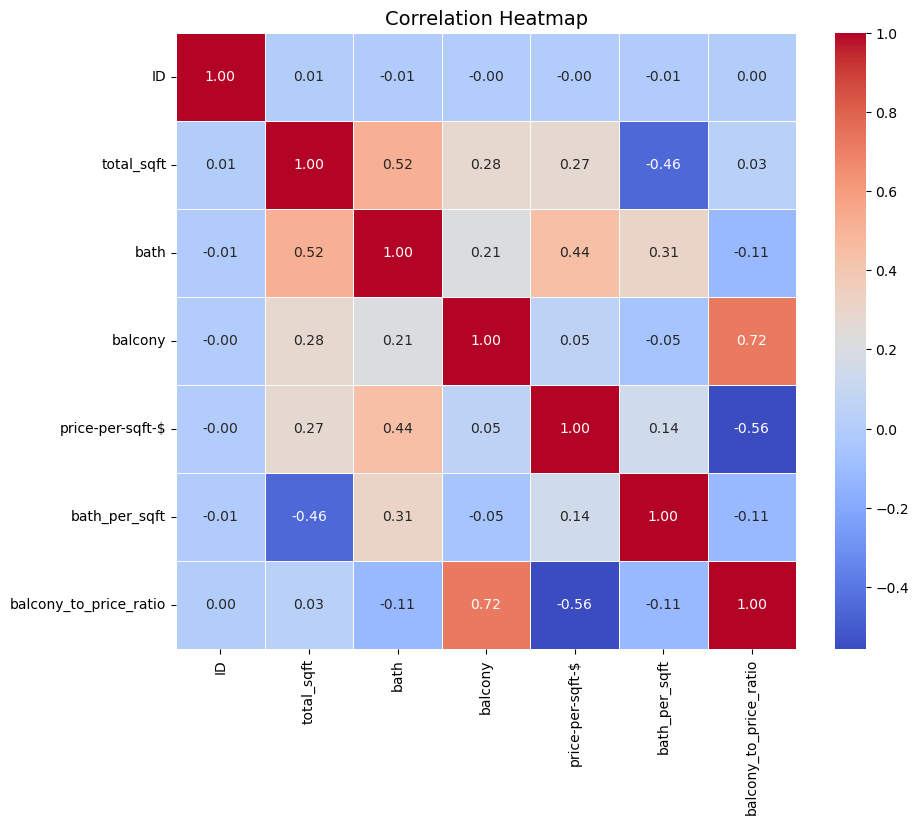

In [59]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)  # Ensure to include only numerical columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [15]:
# Step 1: Identify and convert problematic columns to numeric
for col in ['total_sqft', 'price-per-sqft-$', 'bath', 'balcony']:
    if col in data.columns:
        print(f"\nConverting '{col}' to numeric...")
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, coerce invalid values to NaN

# Step 2: Handle missing values by replacing NaN with median
for col in ['total_sqft', 'price-per-sqft-$', 'bath', 'balcony']:
    if col in data.columns:
        print(f"Handling missing values in '{col}'...")
        data[col] = data[col].fillna(data[col].median())

# Step 3: Recalculate derived features after fixing base columns
data['bath_per_sqft'] = data['bath'] / data['total_sqft']
data['balcony_to_price_ratio'] = data['balcony'] / data['price-per-sqft-$']

# Replace Inf or NaN in derived features
for feature in ['bath_per_sqft', 'balcony_to_price_ratio']:
    data[feature] = data[feature].replace([np.inf, -np.inf], np.nan).fillna(data[feature].median())

# Validate the dataset after cleaning
print("\nSummary of Cleaned Data:")
print(data.info())
print(data.describe())


Converting 'total_sqft' to numeric...

Converting 'price-per-sqft-$' to numeric...

Converting 'bath' to numeric...

Converting 'balcony' to numeric...
Handling missing values in 'total_sqft'...
Handling missing values in 'price-per-sqft-$'...
Handling missing values in 'bath'...
Handling missing values in 'balcony'...

Summary of Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13320 non-null  int64  
 1   property_scope          13320 non-null  object 
 2   availability            13320 non-null  object 
 3   location                13319 non-null  object 
 4   size                    13304 non-null  object 
 5   total_sqft              13320 non-null  float64
 6   bath                    13320 non-null  float64
 7   balcony                 13320 non-null  float64
 8   buying o

In [17]:
# Detect and cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values beyond the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to numerical columns
for column in ['total_sqft', 'price-per-sqft-$', 'bath_per_sqft', 'balcony_to_price_ratio']:
    if column in data.columns:
        cap_outliers(data, column)

# Validate outliers are handled
print("\nSummary Statistics After Handling Outliers:")
print(data.describe())


Summary Statistics After Handling Outliers:
                 ID    total_sqft          bath       balcony  \
count  13320.000000  13320.000000  13320.000000  13320.000000   
mean    6659.500000   1419.700582      2.688814      1.603378   
std     3845.297128    507.854704      1.338754      0.803067   
min        0.000000    266.000000      1.000000      0.000000   
25%     3329.750000   1100.000000      2.000000      1.000000   
50%     6659.500000   1275.000000      2.000000      2.000000   
75%     9989.250000   1656.000000      3.000000      2.000000   
max    13319.000000   2490.000000     40.000000      3.000000   

       price-per-sqft-$  bath_per_sqft  balcony_to_price_ratio  
count      13320.000000   13320.000000            13320.000000  
mean         700.421467       0.001781                0.002597  
std          294.540850       0.000436                0.001627  
min           30.398684       0.000826                0.000000  
25%          486.428571       0.001524      

In [19]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = ['bath', 'balcony', 'total_sqft', 'bath_per_sqft', 'balcony_to_price_ratio']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Validate scaled features
print("\nSummary Statistics After Scaling:")
print(data[numerical_features].describe())


Summary Statistics After Scaling:
               bath       balcony    total_sqft  bath_per_sqft  \
count  1.332000e+04  1.332000e+04  1.332000e+04   1.332000e+04   
mean  -4.267524e-17  9.601929e-18 -8.321672e-17  -3.040611e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00   1.000038e+00   
min   -1.261529e+00 -1.996643e+00 -2.271799e+00  -2.191365e+00   
25%   -5.145380e-01 -7.513706e-01 -6.295355e-01  -5.886791e-01   
50%   -5.145380e-01  4.939020e-01 -2.849359e-01  -1.303574e-01   
75%    2.324534e-01  4.939020e-01  4.653069e-01   4.797781e-01   
max    2.787113e+01  1.739175e+00  2.107571e+00   2.082464e+00   

       balcony_to_price_ratio  
count            1.332000e+04  
mean             2.933923e-16  
std              1.000038e+00  
min             -1.595669e+00  
25%             -7.020865e-01  
50%             -1.709825e-01  
75%              6.156862e-01  
max              2.592345e+00  


In [20]:
# Check for infinite values in numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
print("Infinite Values Before Replacement:\n", np.isinf(data[numeric_cols]).sum())

# Replace infinite values with NaN
data[numeric_cols] = data[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Replace NaN values with column median
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Validate final dataset
print("\nFinal Dataset Validation:")
print("Missing Values:\n", data.isnull().sum())
print("Infinite Values After Replacement:\n", np.isinf(data[numeric_cols]).sum())

Infinite Values Before Replacement:
 ID                        0
total_sqft                0
bath                      0
balcony                   0
price-per-sqft-$          0
bath_per_sqft             0
balcony_to_price_ratio    0
dtype: int64

Final Dataset Validation:
Missing Values:
 ID                         0
property_scope             0
availability               0
location                   1
size                      16
total_sqft                 0
bath                       0
balcony                    0
buying or not buying       0
BER                        0
Renovation needed          0
price-per-sqft-$           0
bath_per_sqft              0
balcony_to_price_ratio     0
dtype: int64
Infinite Values After Replacement:
 ID                        0
total_sqft                0
bath                      0
balcony                   0
price-per-sqft-$          0
bath_per_sqft             0
balcony_to_price_ratio    0
dtype: int64


In [23]:
# Replace missing values in 'location' with mode
data['location'] = data['location'].fillna(data['location'].mode()[0])

# Replace missing values in 'size' with mode
data['size'] = data['size'].fillna(data['size'].mode()[0])

# Validate final dataset
print("\nFinal Dataset Validation:")
print("Missing Values:\n", data.isnull().sum())


Final Dataset Validation:
Missing Values:
 ID                        0
property_scope            0
availability              0
location                  0
size                      0
total_sqft                0
bath                      0
balcony                   0
buying or not buying      0
BER                       0
Renovation needed         0
price-per-sqft-$          0
bath_per_sqft             0
balcony_to_price_ratio    0
dtype: int64


In [25]:
# First, standardize all occurrences of 'Bedroomroom' or similar issues to 'Bedroom'
data['size'] = data['size'].str.replace('Bedroomroom', 'Bedroom', regex=False)

# Then, replace standalone 'BED' with 'Bedroom' using a regex
data['size'] = data['size'].str.replace(r'\bBED\b', 'Bedroom', regex=True)

# Verify the changes
print(data['size'].unique())

['2 Bedroom' '4 Bedroom' '3 Bedroom' '6 Bedroom' '1 Bedroom' '8 Bedroom'
 '7 Bedroom' '5 Bedroom' '11 Bedroom' '9 Bedroom' '27 Bedroom'
 '10 Bedroom' '19 Bedroom' '16 Bedroom' '43 Bedroom' '14 Bedroom'
 '12 Bedroom' '13 Bedroom' '18 Bedroom']


In [27]:
# Check unique values in the 'size' column
print(data['size'].value_counts())

size
2 Bedroom     5544
3 Bedroom     4857
4 Bedroom     1417
1 Bedroom      656
5 Bedroom      356
6 Bedroom      221
7 Bedroom      100
8 Bedroom       89
9 Bedroom       54
10 Bedroom      14
11 Bedroom       4
27 Bedroom       1
19 Bedroom       1
16 Bedroom       1
43 Bedroom       1
14 Bedroom       1
12 Bedroom       1
13 Bedroom       1
18 Bedroom       1
Name: count, dtype: int64


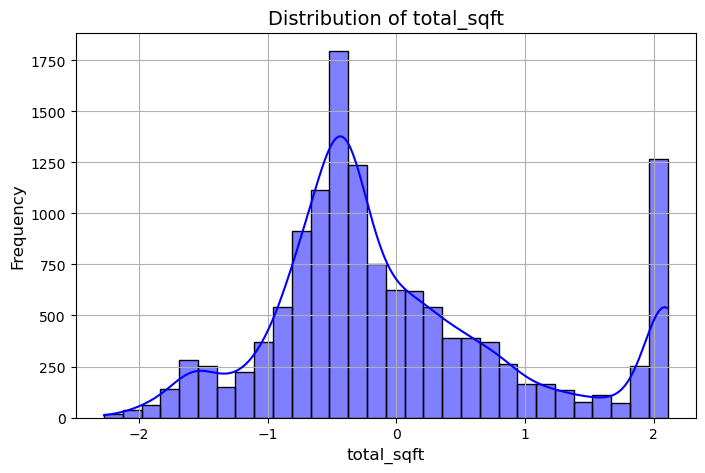

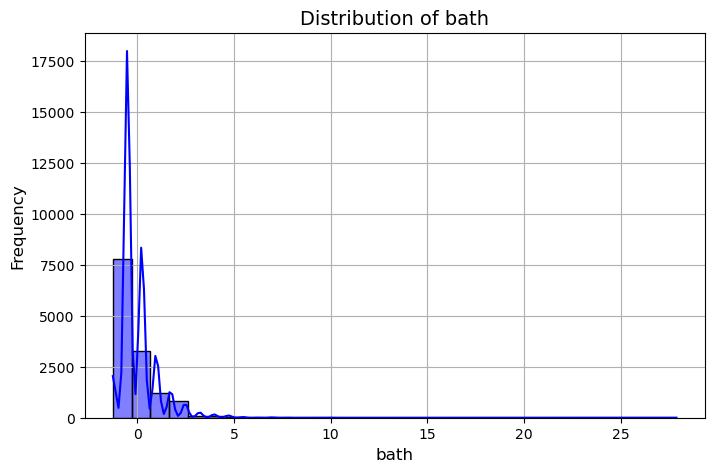

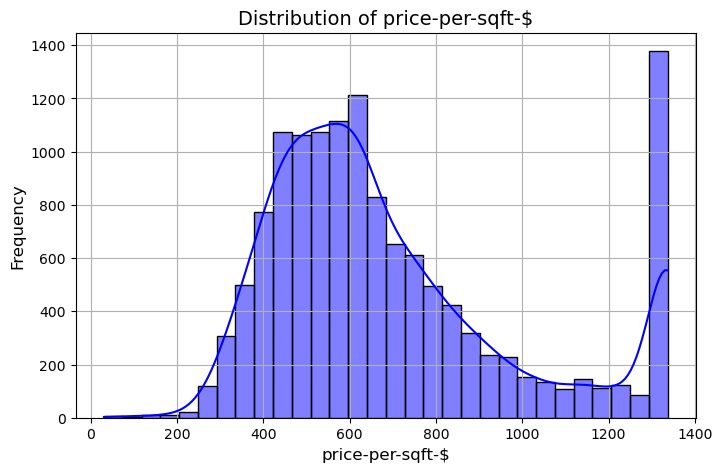

In [63]:
numerical_features = ['total_sqft', 'bath', 'price-per-sqft-$']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid()
    plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features and target
X = data.drop(columns=['buying or not buying'])
y = data['buying or not buying']

# Encode categorical features in X
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})  # Ensure target is binary numeric

# Train-test split
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_test has the same columns as X_train_balanced
X_test = X_test.reindex(columns=X_train_balanced.columns, fill_value=0)

# Validate the split
print("\nTraining Set Shape:", X_train_balanced.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (10656, 120)
Testing Set Shape: (2664, 120)


In [37]:
# Import models
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import evaluation metrics
from sklearn.metrics import classification_report
# Logistic Regression
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

# SVM
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm_model.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      1797
           1       0.41      0.46      0.44       867

    accuracy                           0.61      2664
   macro avg       0.57      0.57      0.57      2664
weighted avg       0.62      0.61      0.62      2664

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1797
           1       0.45      0.46      0.45       867

    accuracy                           0.64      2664
   macro avg       0.59      0.59      0.59      2664
weighted avg       0.64      0.64      0.64      2664

Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83      1797
           1       0.75      0.26      0.39       867

    accuracy                           0.73      2664
   macro avg       0.74      0.61      0.61      2664

Explained Variance Ratio: [0.99416648]


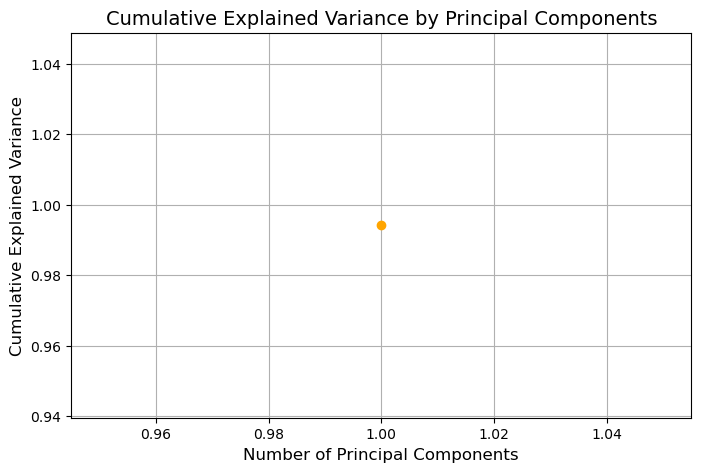

K-Means Silhouette Score (Sampled): 0.5984323707110217


In [65]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# PCA
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', color="orange")
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid()
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Resample the data for silhouette score computation
X_sample, labels_sample = resample(X_pca, cluster_labels, n_samples=1000, random_state=42)

# Compute silhouette score on the subset
silhouette_avg = silhouette_score(X_sample, labels_sample)
print(f"K-Means Silhouette Score (Sampled): {silhouette_avg}")

C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sai nikhil vaddadi\anaconda3\Lib\sit

Tuned Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      1797
           1       0.92      0.23      0.37       867

    accuracy                           0.74      2664
   macro avg       0.82      0.61      0.60      2664
weighted avg       0.79      0.74      0.69      2664

Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       1.00      0.23      0.37       867

    accuracy                           0.75      2664
   macro avg       0.86      0.61      0.61      2664
weighted avg       0.82      0.75      0.69      2664



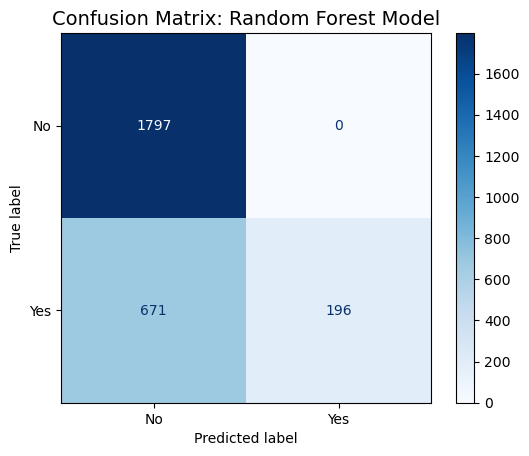

In [67]:
# Import for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import for Evaluation Metrics
from sklearn.metrics import classification_report

# Logistic Regression Tuning
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='recall')
grid_lr.fit(X_train_balanced, y_train_balanced)
best_log_reg = grid_lr.best_estimator_
y_pred_lr_tuned = best_log_reg.predict(X_test)
print("Tuned Logistic Regression Report:\n", classification_report(y_test, y_pred_lr_tuned))

# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_balanced, y_train_balanced)
best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("Tuned Random Forest Report:\n", classification_report(y_test, y_pred_rf_tuned))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)  # `y_pred_rf` is your Random Forest predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest Model', fontsize=14)
plt.show()

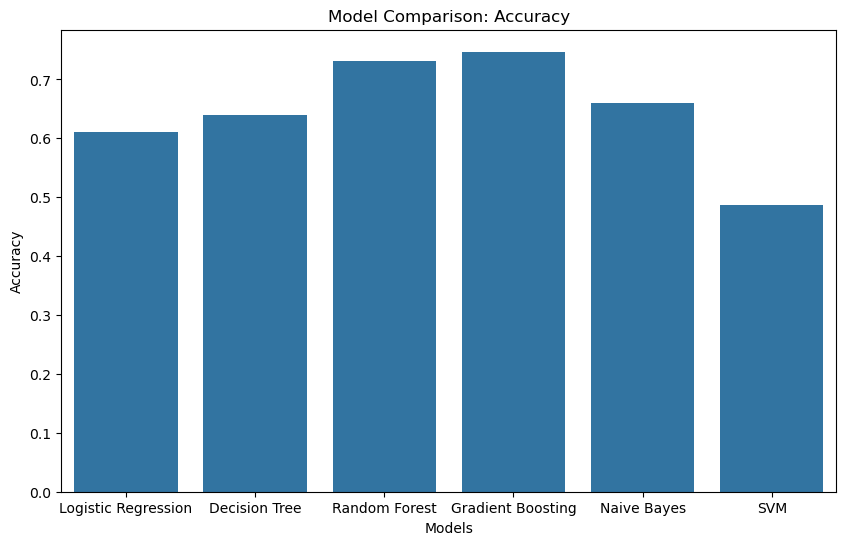

In [43]:
# Import for accuracy score
from sklearn.metrics import accuracy_score

# Import for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model Comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
]

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred_nb = nb_model.predict(X_test)

# Evaluate and compare models
models = {'Logistic Regression': y_pred_log, 'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf,
          'Gradient Boosting': y_pred_gb, 'Naive Bayes': y_pred_nb}

for name, preds in models.items():
    print(f"{name} Accuracy:", accuracy_score(y_test, preds))
    print(f"{name} Classification Report:\n", classification_report(y_test, preds))

C:\Users\sai nikhil vaddadi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7432432432432432
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      1797
           1       0.92      0.23      0.37       867

    accuracy                           0.74      2664
   macro avg       0.82      0.61      0.60      2664
weighted avg       0.79      0.74      0.69      2664

Decision Tree Accuracy: 0.6388888888888888
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1797
           1       0.45      0.46      0.45       867

    accuracy                           0.64      2664
   macro avg       0.59      0.59      0.59      2664
weighted avg       0.64      0.64      0.64      2664

Random Forest Accuracy: 0.7304804804804805
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96   

In [45]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features for Logistic Regression
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_balanced)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression(max_iter=2000, penalty='l2', C=0.1, solver='liblinear')
log_reg.fit(X_train_poly, y_train_balanced)
y_pred_log = log_reg.predict(X_test_poly)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7132132132132132
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82      1797
           1       0.75      0.18      0.29       867

    accuracy                           0.71      2664
   macro avg       0.73      0.57      0.55      2664
weighted avg       0.72      0.71      0.65      2664



In [46]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7436186186186187
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      1797
           1       0.89      0.24      0.38       867

    accuracy                           0.74      2664
   macro avg       0.81      0.61      0.61      2664
weighted avg       0.78      0.74      0.69      2664



In [49]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train_balanced, y_train_balanced)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7481231231231231
Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       1.00      0.23      0.37       867

    accuracy                           0.75      2664
   macro avg       0.86      0.61      0.61      2664
weighted avg       0.82      0.75      0.69      2664



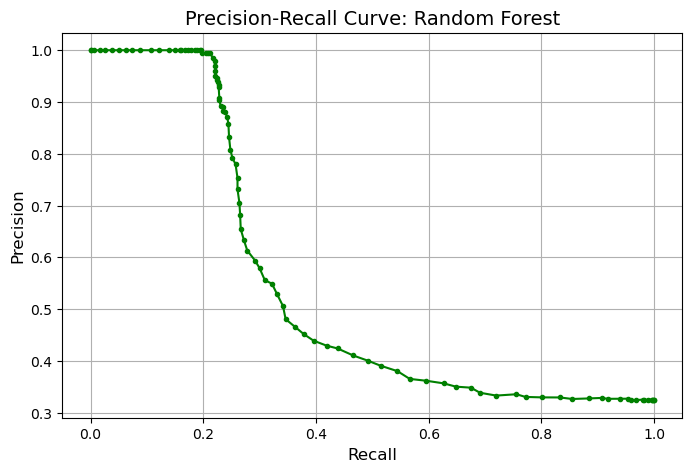

In [69]:
from sklearn.metrics import precision_recall_curve

# Generate probabilities from Random Forest Model
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Yes)

# Calculate Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

# Precision-Recall Plot
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', color='green')
plt.title('Precision-Recall Curve: Random Forest', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid()
plt.show()

In [50]:
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7473723723723724
Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       0.99      0.23      0.37       867

    accuracy                           0.75      2664
   macro avg       0.86      0.61      0.61      2664
weighted avg       0.81      0.75      0.69      2664



In [51]:
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6599099099099099
Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      1797
           1       0.47      0.35      0.40       867

    accuracy                           0.66      2664
   macro avg       0.60      0.58      0.58      2664
weighted avg       0.64      0.66      0.64      2664



In [52]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train_balanced, y_train_balanced)
y_pred_stack = stack_model.predict(X_test)

print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Model Report:\n", classification_report(y_test, y_pred_stack))

Stacking Model Accuracy: 0.7473723723723724
Stacking Model Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       0.98      0.23      0.37       867

    accuracy                           0.75      2664
   macro avg       0.85      0.61      0.61      2664
weighted avg       0.81      0.75      0.69      2664



In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_balanced, y_train_balanced, cv=5)
print("Cross-Validation Accuracy:", np.mean(scores))

Cross-Validation Accuracy: 0.7416482145545565
